In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
init = np.load('params.npy')
file = np.loadtxt('1M_track.txt')
solt = file[807:1678,0]
solm = file[807:1678,1]
soll = file[807:1678,6]
solr = np.power(10,file[807:1678,13])*.00465047

in_a = init[0]; in_e = init[1]; in_i = init[2]; in_p = init[3]
in_l = init[4]; in_x = init[5]; in_y = init[6]

ct_e = np.load('ctrl/Ctrl_Ejects.npy')
ct_n = np.rint(np.load('ctrl/Ctrl_Hillcr.npy')[0]).astype(int)
ct_h = np.load('ctrl/Ctrl_Hillcr.npy')[1]*20/1e6

ny_e = np.load('cno_yark/NoYk_Ejects.npy')
ny_n = np.rint(np.load('cno_yark/NoYk_Hillcr.npy')[0]).astype(int)
ny_h = np.load('cno_yark/NoYk_Hillcr.npy')[1]*20/1e6

a1_e= np.load('1a/1kA_Ejects.npy'); b1_e= np.load('1b/1kB_Ejects.npy'); c1_e= np.load('1c/1kC_Ejects.npy')
a1_n = np.rint(np.load('1a/1kA_Hillcr.npy')[0]).astype(int)
b1_n = np.rint(np.load('1b/1kB_Hillcr.npy')[0]).astype(int)
c1_n = np.rint(np.load('1c/1kC_Hillcr.npy')[0]).astype(int)
a1_h = np.load('1a/1kA_Hillcr.npy')[1]*20/1e6
b1_h = np.load('1b/1kB_Hillcr.npy')[1]*20/1e6
c1_h = np.load('1c/1kC_Hillcr.npy')[1]*20/1e6

a10e = np.load('10a/10kA_Ejects.npy'); b10e = np.load('10b/10kB_Ejects.npy'); c10e = np.load('10c/10kC_Ejects.npy')
a10n = np.rint(np.load('10a/10kA_Hillcr.npy')[0]).astype(int)
b10n = np.rint(np.load('10b/10kB_Hillcr.npy')[0]).astype(int)
c10n = np.rint(np.load('10c/10kC_Hillcr.npy')[0]).astype(int)
a10h = np.load('10a/10kA_Hillcr.npy')[1]*20/1e6
b10h = np.load('10b/10kB_Hillcr.npy')[1]*20/1e6
c10h = np.load('10c/10kC_Hillcr.npy')[1]*20/1e6

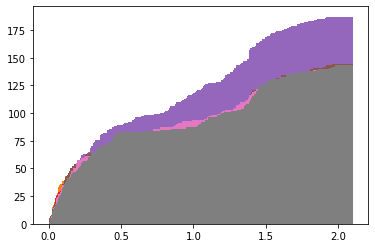

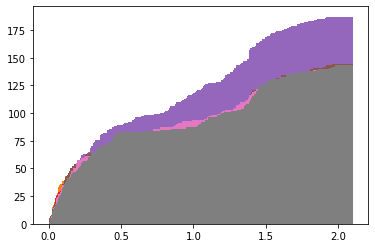

In [33]:
ctrlh, bct, bar = plt.hist(ct_h,cumulative=True,range=[0,2.1],bins=400)
nyrkh, bny, bar = plt.hist(ny_h,cumulative=True,range=[0,2.1],bins=400)

a1hst, ba1, bar = plt.hist(a1_h,cumulative=True,range=[0,2.1],bins=400)
a10hst,ba10,bar = plt.hist(a10h,cumulative=True,range=[0,2.1],bins=400)
b1hst, bb1, bar = plt.hist(b1_h,cumulative=True,range=[0,2.1],bins=400)
b10hst,bb10,bar = plt.hist(b10h,cumulative=True,range=[0,2.1],bins=400)
c1hst, bc1, bar = plt.hist(c1_h,cumulative=True,range=[0,2.1],bins=400)
c10hst,bc10,bar = plt.hist(c10h,cumulative=True,range=[0,2.1],bins=400)

ctmax = max(ctrlh)

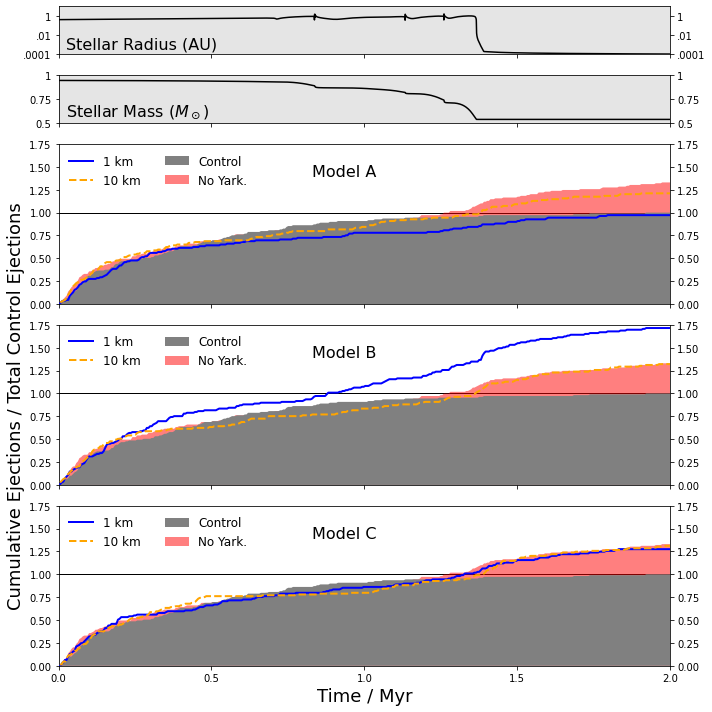

In [58]:
fig, ax = plt.subplots(5,figsize=(10,10),sharex=True,gridspec_kw={'height_ratios': [.3,.3,1, 1,1]})
plt.subplots_adjust(hspace=0)

ax[0].plot((solt-solt[0])/1e6,solr,'k')
ax[0].set_yscale('log')
ax[0].set_ylim(0.0001,10)
ax[0].set_yticks([.0001,.01,1])
ax[0].set_yticklabels([r'.0001',r'.01',r"1"])
ax[0].text(0.025,0.0004,'Stellar Radius (AU)',fontsize=16)
ax[0].fill_between([0,2],[0.0001,0.0001],[10,10],facecolor='k',alpha=0.1)

ax[1].plot((solt-solt[0])/1e6,solm,'k')
ax[1].set_ylim(0.5,1)
ax[1].set_yticks([.5,.75,1])
ax[1].set_yticklabels([r'0.5','0.75',r'1'])
ax[1].text(0.025,0.58,r'Stellar Mass ($M_\odot$)',fontsize=16)
ax[1].fill_between([0,2],[0.5,0.5],[1,1],facecolor='k',alpha=0.1,zorder=0)

ax[2].plot(ba1[1:],a1hst/ctmax,c='b',lw=2,zorder=10)
ax[2].plot(ba10[1:],a10hst/ctmax,c='orange',ls='--',lw=2,zorder=10)
ax[2].text(0.83,1.4,'Model A',fontsize=16)


ax[3].plot(bb1[1:],b1hst/ctmax,c='b',lw=2,zorder=10)
ax[3].plot(bb10[1:],b10hst/ctmax,c='orange',ls='--',lw=2,zorder=10)
ax[3].set_ylabel('Cumulative Ejections / Total Control Ejections', fontsize=18)
ax[3].text(0.83,1.4,'Model B',fontsize=16)


ax[4].plot(bc1[1:],c1hst/ctmax,c='b',lw=2,zorder=10)
ax[4].plot(bc10[1:],c10hst/ctmax,c='orange',ls='--',lw=2,zorder=10)
ax[4].text(0.83,1.4,'Model C',fontsize=16)
ax[4].set_xticks([0,.5,1,1.5,2])
ax[4].set_xlabel('Time / Myr', fontsize=18)

for i in range(3):
    ax[i+2].set_xlim(0,2)
    ax[i+2].set_yticks([0,.25,.5,.75,1,1.25,1.5,1.75])
    ax[i+2].set_ylim(0,1.75)
    ax[i+2].fill_between(bct[1:],np.zeros_like(bct[1:]),ctrlh/ctmax,facecolor='grey',zorder=2)
    ax[i+2].fill_between(bny[1:],np.zeros_like(bny[1:]),nyrkh/ctmax,facecolor='red',alpha=0.5,zorder=1)
    ax[i+2].legend(labels=['1 km', '10 km','Control','No Yark.'],
          fontsize=12,ncol=2,frameon=False,loc='upper left')
    ax[i+2].plot(np.linspace(0,2),np.ones(50),'k',lw=1,zorder=0)
    
for i in range(5):
    ax[i].tick_params(right=True,labelright=True)

fig.tight_layout()
fig.show()
fig.savefig('ejections_hists_normed.png',dpi=300)

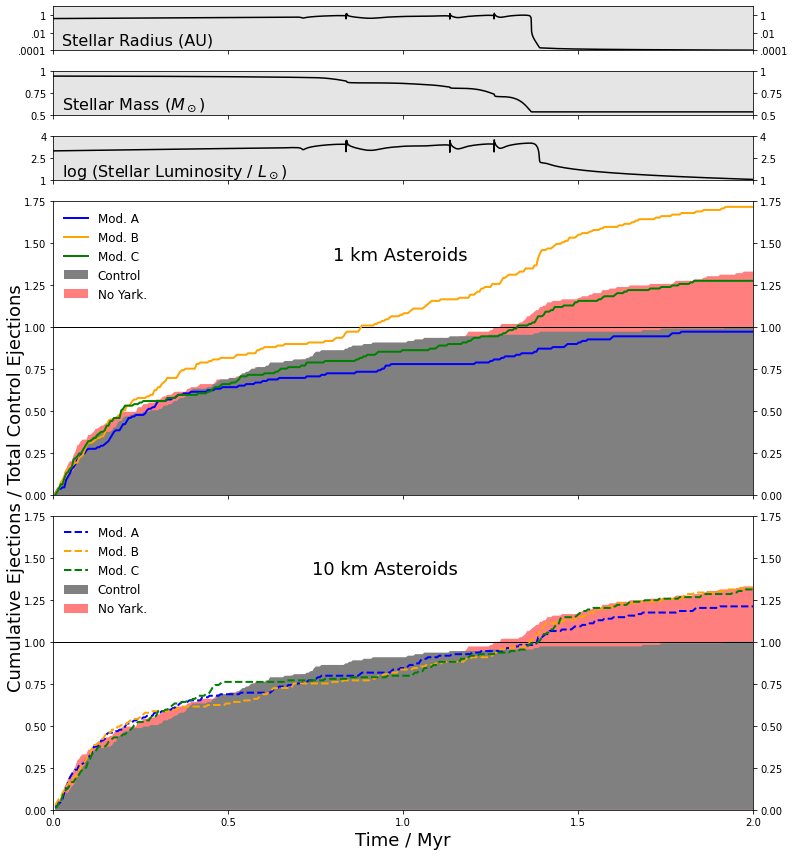

In [98]:
fig, ax = plt.subplots(5,figsize=(11,12),sharex=True,gridspec_kw={'height_ratios': [.15,.15,.15,1,1]})
plt.subplots_adjust(hspace=0.05)

ax[0].plot((solt-solt[0])/1e6,solr,'k')
ax[0].set_yscale('log')
ax[0].set_ylim(0.0001,10)
ax[0].set_yticks([.0001,.01,1])
ax[0].set_yticklabels([r'.0001',r'.01',r"1"])
ax[0].text(0.025,0.0004,'Stellar Radius (AU)',fontsize=16)
ax[0].fill_between([0,2],[0.0001,0.0001],[10,10],facecolor='k',alpha=0.1)

ax[1].plot((solt-solt[0])/1e6,solm,'k')
ax[1].set_ylim(0.5,1)
ax[1].set_yticks([.5,.75,1])
ax[1].set_yticklabels([r'0.5','0.75',r'1'])
ax[1].text(0.025,0.58,r'Stellar Mass ($M_\odot$)',fontsize=16)
ax[1].fill_between([0,2],[0.5,0.5],[1,1],facecolor='k',alpha=0.1,zorder=0)

ax[2].plot((solt-solt[0])/1e6,soll,'k')
ax[2].set_ylim(1,4)
ax[2].set_yticks([1,2.5,4])
ax[2].set_yticklabels([r'1','2.5',r'4'])
ax[2].text(0.025,1.3,r'log (Stellar Luminosity / $L_\odot$)',fontsize=16)
ax[2].fill_between([0,2],[0.5,0.5],[4,4],facecolor='k',alpha=0.1,zorder=0)

ax[3].plot(ba1[1:],a1hst/ctmax,c='b',lw=2,zorder=10)
ax[3].plot(bb1[1:],b1hst/ctmax,c='orange',lw=2,zorder=10)
ax[3].plot(bc1[1:],c1hst/ctmax,c='g',lw=2,zorder=10)
ax[3].text(0.8,1.4,'1 km Asteroids', fontsize=18)

ax[4].plot(ba10[1:],a10hst/ctmax,c='b',ls='--',lw=2,zorder=10)
ax[4].plot(bb10[1:],b10hst/ctmax,c='orange',ls='--',lw=2,zorder=10)
ax[4].plot(bc10[1:],c10hst/ctmax,c='g',ls='--',lw=2,zorder=10)
ax[4].text(0.74,1.4,'10 km Asteroids', fontsize=18)

fig.text(0, 0.2, 'Cumulative Ejections / Total Control Ejections', rotation='vertical',fontsize=18)
ax[4].set_xlabel('Time / Myr', fontsize=18)


for i in range(2):
    ax[i+3].set_yticks([0,.25,.5,.75,1,1.25,1.5,1.75])
    ax[i+3].set_xticks([0,.5,1,1.5,2])

    ax[i+3].set_xlim(0,2)
    ax[i+3].set_ylim(0,1.75)

    ax[i+3].fill_between(bct[1:],np.zeros_like(bct[1:]),ctrlh/ctmax,facecolor='grey',zorder=2)
    ax[i+3].fill_between(bny[1:],np.zeros_like(bny[1:]),nyrkh/ctmax,facecolor='red',alpha=0.5,zorder=0)

    ax[i+3].legend(labels=['Mod. A', 'Mod. B','Mod. C','Control','No Yark.'], 
             fontsize=12,frameon=False,loc='upper left')
    ax[i+3].plot(np.linspace(0,2),np.ones(50),'k',lw=1,zorder=2)
    
for i in range(5):
    ax[i].tick_params(right=True,labelright=True)

fig.tight_layout()
fig.show()
fig.savefig('ejections_hists_2plot.png',dpi=300)

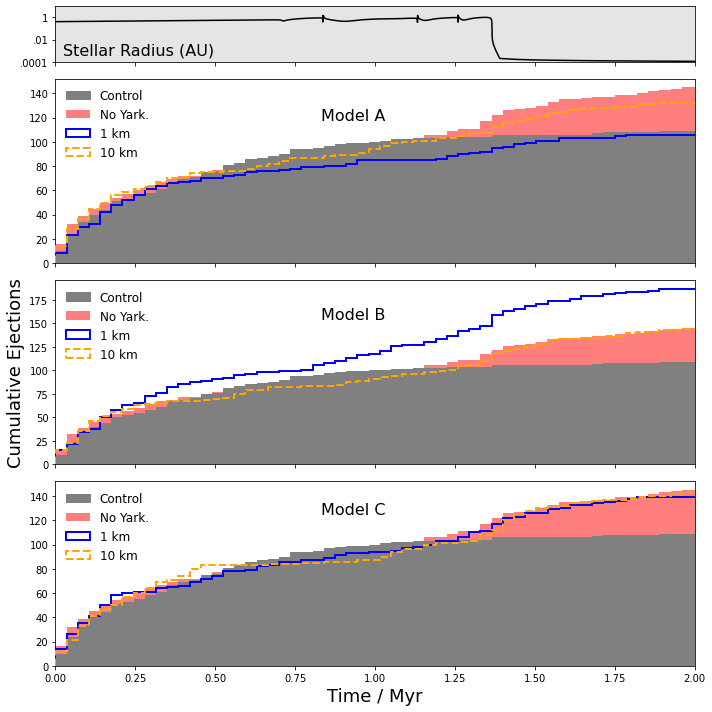

In [23]:
fig, ax = plt.subplots(4,figsize=(10,10),sharex=True,gridspec_kw={'height_ratios': [.3,1, 1,1]})
plt.subplots_adjust(hspace=0)

ax[0].plot((solt-solt[0])/1e6,solr,'k')
ax[0].set_yscale('log')
ax[0].set_ylim(0.0001,10)
ax[0].set_yticks([.0001,.01,1])
ax[0].set_yticklabels([r'.0001',r'.01',r"1"])
ax[0].text(0.025,0.0004,'Stellar Radius (AU)',fontsize=16)
ax[0].fill_between([0,2],[0.0001,0.0001],[10,10],facecolor='k',alpha=0.1)

ax[1].hist(ct_h,facecolor='grey',edgecolor='grey',cumulative=True,histtype=u'stepfilled',range=[0,2.1],bins=60)
ax[1].hist(ny_h,facecolor='r',cumulative=True,histtype=u'stepfilled',alpha=0.5,range=[0,2.1],bins=60,ls='-.',zorder=0)
ax[1].hist(a1_h,edgecolor='b',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,zorder=10)
ax[1].hist(a10h,edgecolor='orange',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,ls='--',zorder=10)
ax[1].set_xlim(0,2)

ax[1].text(0.83,118,'Model A',fontsize=16)

ax[2].hist(ct_h,facecolor='grey',edgecolor='grey',cumulative=True,histtype=u'stepfilled',range=[0,2.1],bins=60)
ax[2].hist(ny_h,facecolor='r',cumulative=True,histtype=u'stepfilled',alpha=0.5,range=[0,2.1],bins=60,ls='-.',zorder=0)
ax[2].hist(b1_h,edgecolor='b',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,zorder=10)
ax[2].hist(b10h,edgecolor='orange',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,ls='--',zorder=10)
ax[2].set_xlim(0,2)
ax[2].set_ylabel('Cumulative Ejections', fontsize=18)
ax[2].text(0.83,155,'Model B',fontsize=16)

ax[4].hist(ct_h,facecolor='grey',edgecolor='grey',cumulative=True,histtype=u'stepfilled',range=[0,2.1],bins=60)
ax[4].hist(ny_h,facecolor='r',cumulative=True,histtype=u'stepfilled',alpha=0.5,range=[0,2.1],bins=60,ls='-.',zorder=0)
ax[4].hist(c1_h,edgecolor='b',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,zorder=10)
ax[4].hist(c10h,edgecolor='orange',cumulative=True,histtype=u'step',lw=2,range=[0,2.1],bins=60,ls='--',zorder=10)
ax[4].set_xlim(0,2)
ax[4].text(0.83,125,'Model C',fontsize=16)
ax[4].set_xlabel('Time / Myr', fontsize=18)

for i in range(3):
    ax[i+1].set_xlim(0,2)
    ax[i+1].legend(labels=['Control','No Yark.','1 km', '10 km'],
          fontsize=12,frameon=False,loc='upper left')

fig.tight_layout()
fig.show()
#fig.savefig('ejections_time.png',dpi=300)